## 1 - Introdução

#### Objetivo: Descobrir baseado em algumas características se a estrela é pulsar ou não pulsar.
#### Modelo de Redes Neurais utilizado: Multilayer classifier e Keras - (modelo supervisionado e de classificação)

- O HTRU2 é um conjunto de dados que descreve uma amostra de características de pulsares. Os pulsares são um tipo raro de estrela de nêutrons que produz emissões de rádio detectáveis na Terra. Eles são de considerável interesse científico como em sondas do espaço-tempo, meio inter-estelar e estados da matéria. Cada pulsar produz um padrão de emissão ligeiramente diferente, que varia levemente a cada rotação. Assim, uma detecção de sinal em potencial conhecida como 'candidato' é calculada sobre muitas rotações do pulsar, conforme determinado pela duração de uma observação.


- As ferramentas de aprendizado de máquina estão sendo usadas agora para rotular automaticamente os candidatos do pulsar para facilitar uma análise rápida. Sistemas de classificação em particular estão sendo amplamente adotados, e tratam os conjuntos de dados dos candidatos como problemas de classificação binária. Aqui, os exemplos legítimos de pulsares são uma classe positiva minoritária, e exemplos espúrios e de uma classe negativa majoritária. Atualmente, os rótulos de várias classes não estão disponíveis, dados os custos associados à anotação de dados. Os rótulos de classe usados são 0 (negativo) e 1 (positivo).


- Cada candidato é descrito por 8 variáveis contínuas e uma única variável de classe como são descritas abaixo:
- 1 - Média do perfil integrado. 
- 2 - Desvio padrão do perfil integrado.
- 3 - Excesso de curtose do perfil integrado.
- 4 - Inclinação do perfil integrado.
- 5 - Média da curva DM-SNR.
- 6 - Desvio padrão da curva DM-SNR.
- 7 - Excesso de curtose da curva DM-SNR.
- 8 - Skewness da curva DM-SNR.
- 9 - Classe


- Resumo do dataset

17.898 exemplos no total.
1.639 exemplos positivos.
16.259 exemplos negativos.


- O conjunto de dados original foi baixado do repositório UCI ML:
Lichman, M. (2013). Repositório de aprendizado de máquina da UCI [https://archive.ics.uci.edu/ml/datasets/HTRU2]. Irvine, CA: Universidade da Califórnia - Escola de Informação e Ciência da Computação.


## 2 - Importando os pacotes

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ipy_table as tbl
import tensorflow

from sklearn.neural_network import MLPClassifier 
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from plot_metric.functions import BinaryClassification
from sklearn.metrics import roc_curve

warnings.filterwarnings('ignore')
sns.set_style ("whitegrid")
%matplotlib inline

In [12]:
from google.colab import files # utilizando o google colab
uploaded = files.upload()

Saving HTRU_2.csv to HTRU_2.csv


In [0]:
df = pd.read_csv("HTRU_2.csv", header=None)

## 3 - Data wrangling

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

Corrigindo as colunas

In [0]:
df.columns = ["mean_integrated", "standard_integrated", "excess_integrated", "skewness_integrated", "mean_curve", "standard_curve", "excess_curve", "skewness_curve", "class"]

In [16]:
df.head()

,mean_integrated,standard_integrated,excess_integrated,skewness_integrated,mean_curve,standard_curve,excess_curve,skewness_curve,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_integrated        17898 non-null float64
standard_integrated    17898 non-null float64
excess_integrated      17898 non-null float64
skewness_integrated    17898 non-null float64
mean_curve             17898 non-null float64
standard_curve         17898 non-null float64
excess_curve           17898 non-null float64
skewness_curve         17898 non-null float64
class                  17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [18]:
df.describe()

,mean_integrated,standard_integrated,excess_integrated,skewness_integrated,mean_curve,standard_curve,excess_curve,skewness_curve,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [19]:
df.isnull().values.any()

False

## 4 - Data analysis

### Visualizando a correlação entre as variáveis

Coeficiente de correlação:

+1 = forte correlação positiva

0 = não há correlação

-1 = forte correlação negativa

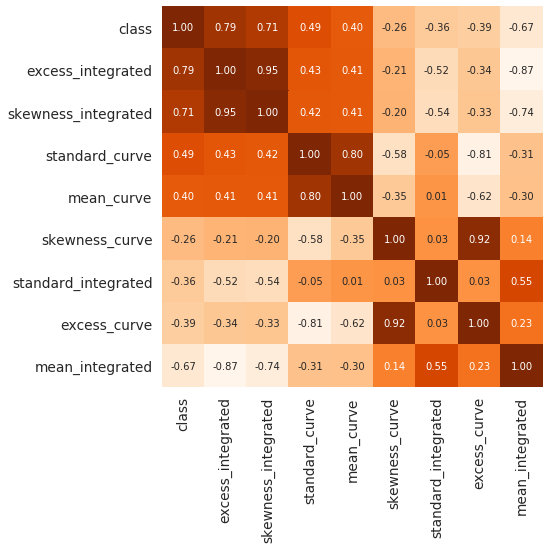

In [23]:
k = 9 #número de variáveis para o heatmap
corrmat = df.corr() #correlação
cols = corrmat.nlargest(k, 'class')['class'].index
tab = np.corrcoef(df[cols].values.T) 

plt.figure(figsize=(7,7))
sns.set(font_scale=1.25)
sns.heatmap(tab, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values, cmap="Oranges")
plt.show()

<Figure size 720x720 with 0 Axes>

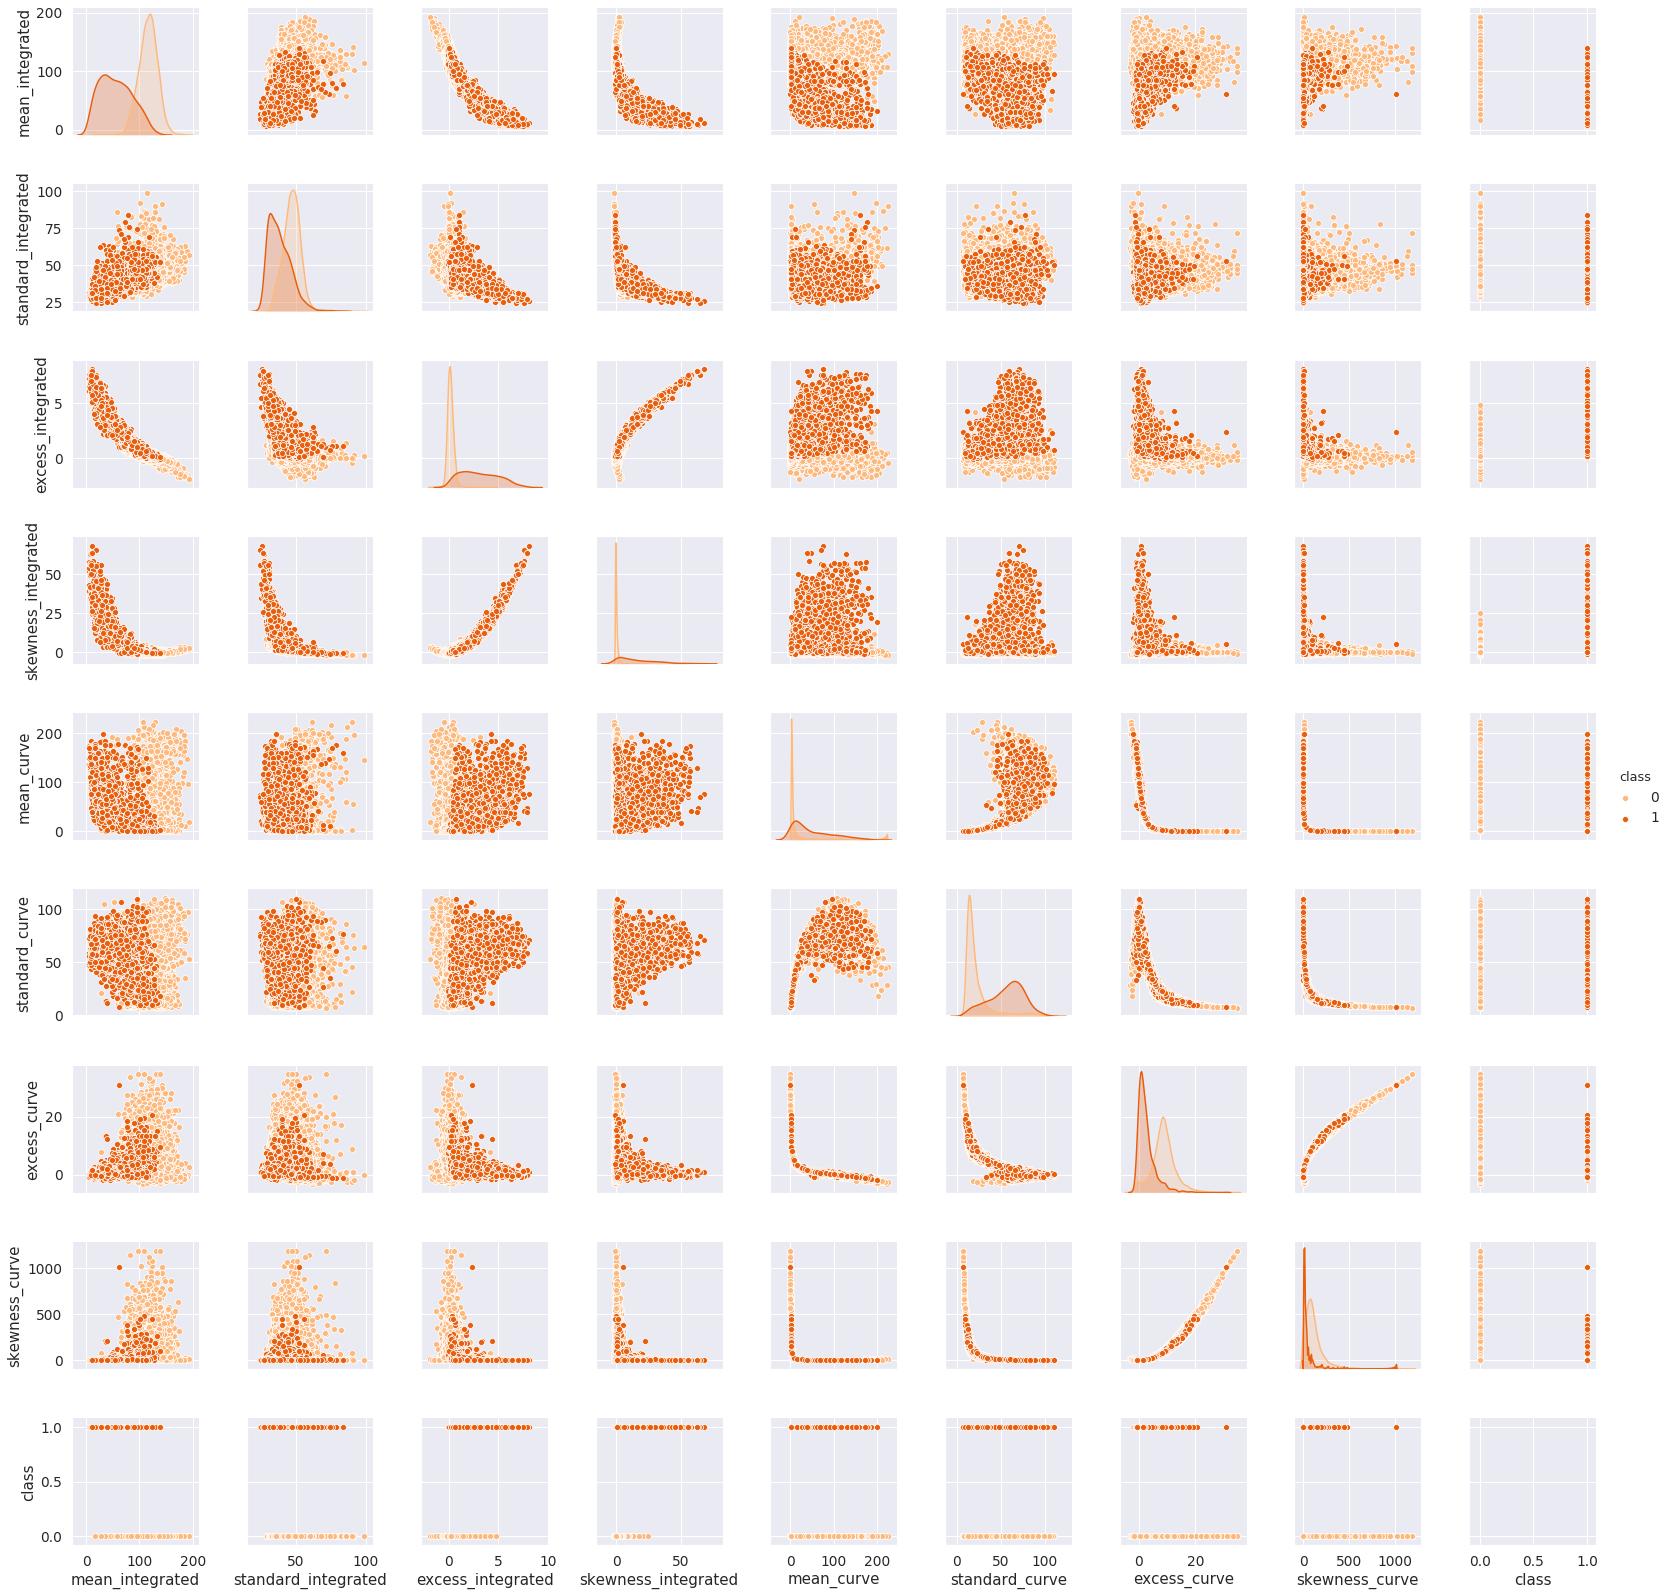

In [24]:
plt.figure(figsize=(10,10))
sns.pairplot (df, hue="class", palette="Oranges")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff833a8de10>,
      dtype=object)

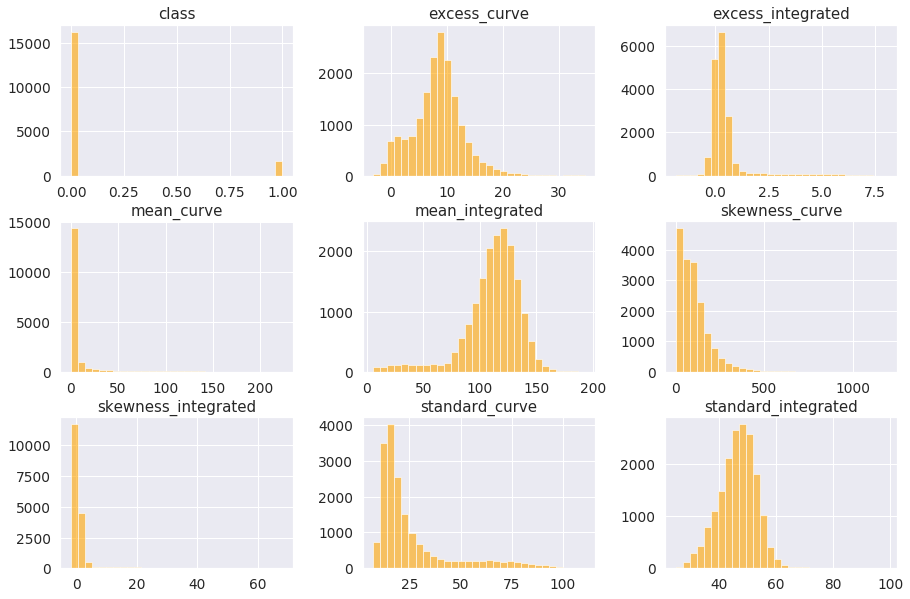

In [26]:
df.hist(bins=30, color="orange", alpha=0.6, figsize=(15,10))

Os 3 gráficos seguintes podem ser visualizados acima, porém decidir refazê-los para ter uma melhor visualização

0    16259
1     1639
Name: class, dtype: int64

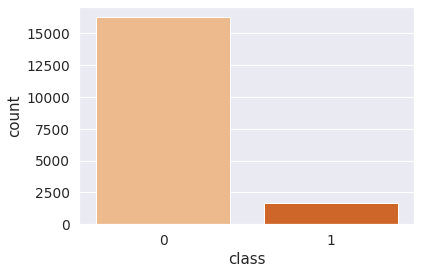

In [27]:
sns.countplot ("class", data=df, palette="Oranges")
df["class"].value_counts()

Text(45.49370008680556, 0.5, 'skewness_curve')

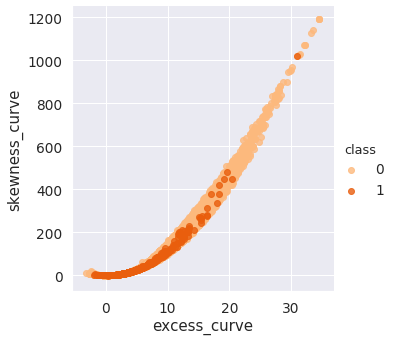

In [28]:
sns.lmplot (x="excess_curve", y="skewness_curve", data=df, hue="class", fit_reg=False, palette="Oranges") 
plt.xlabel ("excess_curve")
plt.ylabel ("skewness_curve")

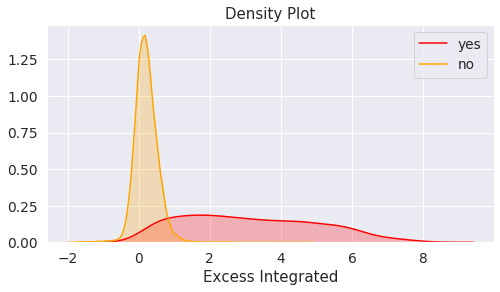

In [29]:
#Gráfico de densidade da média integrada pela classe
plt.figure(figsize=(8,4))
sns.kdeplot(df["excess_integrated"][df["class"] == 1], color="red", shade=True)
sns.kdeplot(df["excess_integrated"][df["class"] == 0], color="orange", shade=True)
plt.legend(['yes', 'no'])
plt.title('Density Plot')
plt.xlabel ("Excess Integrated")
plt.show()

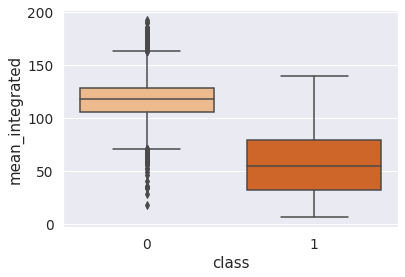

In [30]:
sns.boxplot (x="class", y="mean_integrated", data=df, palette="Oranges", )

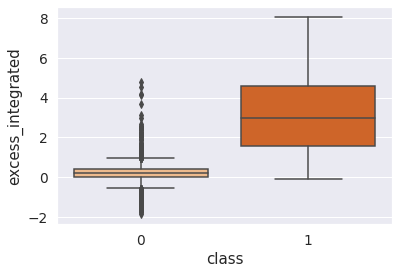

In [31]:
sns.boxplot (x="class", y="excess_integrated", data=df, palette="Oranges", )

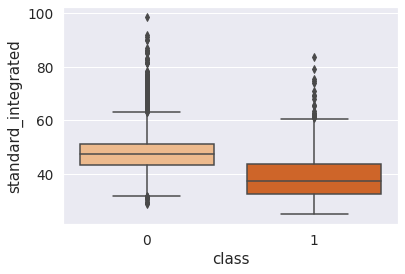

In [32]:
sns.boxplot (x="class", y="standard_integrated", data=df, palette="Oranges", )

## 5 - Machine learning (Redes neurais (MLC e Keras)

In [0]:
X = df.drop("class", axis=1)
y = df["class"]

#### Dividindo os dados entre treino e test

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Aplicando o modelo e fazendo a predição com o Multilayer Classifier

In [35]:
classifier = MLPClassifier(verbose = True, 
                              max_iter=1000,  # número de interações 
                              tol = 0.0000010, # tolerância
                              solver = 'adam', # padrão - é o sthocastic gradient descent"
                              hidden_layer_sizes=(100), # número de camadas ocultas. 
                              activation='relu') # função de ativação. 
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

from sklearn.metrics import classification_report
print (classification_report (y_test, prediction))

Iteration 1, loss = inf
Iteration 2, loss = 0.28672370
Iteration 3, loss = 0.18326536
Iteration 4, loss = 0.14189564
Iteration 5, loss = 0.12273181
Iteration 6, loss = 0.10571750
Iteration 7, loss = 0.09956214
Iteration 8, loss = 0.09426293
Iteration 9, loss = 0.09195527
Iteration 10, loss = 0.08898786
Iteration 11, loss = 0.08850411
Iteration 12, loss = 0.08721775
Iteration 13, loss = 0.09021832
Iteration 14, loss = 0.08702003
Iteration 15, loss = 0.08737676
Iteration 16, loss = 0.08603893
Iteration 17, loss = 0.08516689
Iteration 18, loss = 0.08473614
Iteration 19, loss = 0.08526707
Iteration 20, loss = 0.08685663
Iteration 21, loss = 0.08648193
Iteration 22, loss = 0.08782326
Iteration 23, loss = 0.08309009
Iteration 24, loss = 0.08389204
Iteration 25, loss = 0.08387583
Iteration 26, loss = 0.08528452
Iteration 27, loss = 0.08463991
Iteration 28, loss = 0.09105140
Iteration 29, loss = 0.08427462
Iteration 30, loss = 0.08615856
Iteration 31, loss = 0.08452382
Iteration 32, loss = 0.0

In [37]:
print (confusion_matrix(y_test, prediction))

[[4097   18]
 [  63  297]]


In [38]:
print (classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4115
           1       0.94      0.82      0.88       360

    accuracy                           0.98      4475
   macro avg       0.96      0.91      0.94      4475
weighted avg       0.98      0.98      0.98      4475



#### Aplicando o modelo e fazendo a predição com o Keras

In [39]:
classifier = Sequential()
classifier.add(Dense(units = 5, activation = 'relu', input_dim = 8)) # 8 neurônios de entrada, e duas c.ocultas de 5.
classifier.add(Dense(units = 5, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)
prediction = classifier.predict(X_test)
prediction = (prediction > 0.5)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





13423/13423 [==============================] - 2s 164us/step - loss: 1.2108 - acc: 0.8612
Epoch 2/100
13423/13423 [==============================] - 2s 122us/step - loss: 0.1581 - acc: 0.9460
Epoch 3/100
13423/13423 [==============================] - 2s 123us/step - loss: 0.1177 - acc: 0.9610
Epoch 4/100
13423/13423 [==============================] - 2s 121us/step - loss: 0.1035 - acc: 0.9677
Epoch 5/100
13423/13423 [==============================] - 2s 121us/step - loss: 0.0994 - acc: 0.9696
Epoch 6/100
13423/13423 [==============================] - 2s 123us/step - loss: 0.0982 - acc: 0.9721
Epoch 7/100
13423/13423 [==============================] - 2s 119us/step - loss: 0.0966 - acc: 0.9723
Epoch 8/100
13423/13423 [==============================] - 2s 119us/step - loss: 0.0943 - acc: 0.9736
Epoch 9/100
13423/13423 [==============================] - 2s 123us/step - lo

In [40]:
print (confusion_matrix(y_test, prediction))

[[4089   26]
 [  54  306]]


In [41]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4115
           1       0.92      0.85      0.88       360

    accuracy                           0.98      4475
   macro avg       0.95      0.92      0.94      4475
weighted avg       0.98      0.98      0.98      4475



#### A acurácia do modelo permaneceu em 98%, porém mais equilibrada com o Keras.

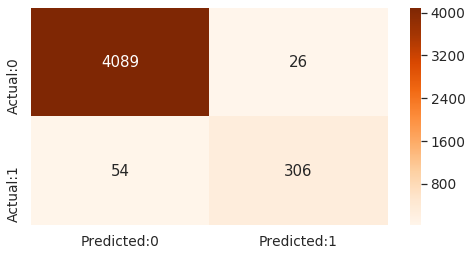

In [42]:
cm=confusion_matrix(y_test,prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,4))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Oranges")

In [0]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

## 6 - Resultados

In [44]:
results = [
    ['The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', (TP+TN)/float(TP+TN+FP+FN)],
    ['The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN))],
    ['Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN)],
    ['Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP)],
    ['Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP)],
    ['Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN)],
    ['Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity)],
    ['Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/(specificity)],    
]
tbl.make_table(results)

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =,0.9821
The Missclassification = 1-Accuracy =,0.0179
Sensitivity or True Positive Rate = TP/(TP+FN) =,0.8500
Specificity or True Negative Rate = TN/(TN+FP) =,0.9937
Positive Predictive value = TP/(TP+FP) =,0.9217
Negative predictive Value = TN/(TN+FN) =,0.9870
Positive Likelihood Ratio = Sensitivity/(1-Specificity) =,134.5288
Negative likelihood Ratio = (1-Sensitivity)/Specificity =,0.1510


## 7 - Conclusão

- O "Excess integrated" e o "Skewness integrated" tem uma forte correlação com a classe.


- O modelo obteve uma acurácia de 98,01 % utilizando o MultiLayer Classifier com 100 neurônios e uma camada oculta. Já o Keras obteve uma acurácia de 98,21% com 8 neurônios na entrada, e duas camadas de 5 neurônios. 


- A sensitividade teve uma acurácia de 85,00% com o Keras. Isso se deve ao fato de que o tamanho do dataset para o valor positivo (yes), ser muito menor que o negativo. Se obtivessem mais dados desse tipo, a acurácia certamente seria melhor.


- Essa base de dados é relativamente pequena para a aplicação de redes neurais. Algoritmos mais simples como o SVM e random forest poderiam resolver com uma acurácia semelhante ou melhor. Cheguei a testar com o Random forest e a acurácia também foi de 98%, mas nesse projeto o meu objetivo era aplicar com o MLC e o Keras. 